In [1]:
from data import load_data
from plotting import hist_plot,time_series_plot,corr_heatmap,sort_corr
from preprocessing import convert_datetime,remove_filers_with_boxplot
from feature_selection import lasso_features_selection

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msn
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)
plt.rcParams['axes.unicode_minus']=False


### Data loading

In [2]:
# Load the raw dataset, which is a gold price prediction dataset I downloaded from Kaggle
data_path="./data/FINAL_USO.csv"
data=load_data(data_path)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
0,2011-12-15,154.740005,154.949997,151.710007,152.330002,152.330002,21521900,123.029999,123.199997,121.989998,122.180000,105.441238,199109200,11825.29004,11967.83984,11825.21973,11868.80957,11868.80957,136930000,74.550003,76.150002,72.150002,72.900002,70.431755,787900,1.3018,1.2982,1.3051,1.2957,1,105.09,104.88,106.50,104.88,14330,1,93.42,94.91,96.00,93.33,0,53604,54248,54248,52316,119440,1,1.911,1.911,1.911,1.911,1,1414.65,1420.30,1423.35,1376.85,0,618.85,614.70,615.00,614.60,1,1425,80.341,80.565,80.630,80.130,22850,0,53.009998,53.139999,51.570000,51.680000,48.973877,20605600,36.900002,36.939999,36.049999,36.130001,36.130001,12616700
1,2011-12-16,154.309998,155.369995,153.899994,155.229996,155.229996,18124300,122.230003,122.949997,121.300003,121.589996,105.597549,220481400,11870.25000,11968.17969,11819.30957,11866.38965,11866.38965,389520000,73.599998,75.099998,73.349998,74.900002,72.364037,896600,1.3035,1.3020,1.3087,1.2997,1,103.35,103.51,104.56,102.46,140080,0,93.79,93.43,94.80,92.53,1,53458,53650,54030,52890,65390,0,1.851,1.851,1.851,1.851,0,1420.25,1414.75,1431.75,1400.70,1,623.65,622.60,623.45,622.30,1,1400,80.249,80.175,80.395,79.935,13150,0,52.500000,53.180000,52.040001,52.680000,49.921513,16285400,36.180000,36.500000,35.730000,36.270000,36.270000,12578800
2,2011-12-19,155.479996,155.860001,154.360001,154.869995,154.869995,12547200,122.059998,122.320000,120.029999,120.290001,104.468536,183903000,11866.54004,11925.87988,11735.19043,11766.25977,11766.25977,135170000,69.099998,69.800003,64.199997,64.699997,62.509384,2096700,1.2995,1.3043,1.3044,1.2981,0,103.64,103.63,104.57,102.37,147880,1,94.09,93.77,94.43,92.55,1,52961,53400,53400,52544,67280,0,1.810,1.810,1.810,1.810,0,1411.10,1422.65,1427.60,1404.60,0,608.80,626.00,630.00,608.60,0,1400,80.207,80.300,80.470,80.125,970,0,52.490002,52.549999,51.029999,51.169998,48.490578,15120200,36.389999,36.450001,35.930000,36.200001,36.200001,7418200
3,2011-12-20,156.820007,157.429993,156.580002,156.979996,156.979996,9136300,122.180000,124.139999,120.370003,123.930000,107.629784,225418100,11769.20996,12117.12988,11768.83008,12103.58008,12103.58008,165180000,66.449997,68.099998,66.000000,67.000000,64.731514,875300,1.3079,1.3003,1.3133,1.2994,1,106.73,104.30,107.27,103.91,170240,1,95.55,96.39,99.70,96.39,1,53487,52795,53575,52595,55130,1,1.927,1.927,1.927,1.927,1,1434.75,1408.95,1436.55,1408.15,1,626.65,622.45,622.45,622.45,1,1400,80.273,80.890,80.940,80.035,22950,1,52.380001,53.250000,52.369999,52.990002,50.215282,11644900,37.299999,37.610001,37.220001,37.560001,37.560001,10041600
4,2011-12-21,156.979996,157.529999,156.130005,157.160004,157.160004,11996100,123.930000,124.360001,122.750000,124.169998,107.838242,194230900,12103.58008,12119.70020,11999.44043,12107.74023,12107.74023,163250000,67.099998,69.400002,66.900002,68.500000,66.180725,837600,1.3045,1.3079,1.3197,1.3024,0,107.71,107.15,108.17,106.16,145090,1,99.01,97.54,99.26,96.81,1,53148,53519,54184,52937,75950,0,1.970,1.970,1.970,1.970,1,1429.05,1434.40,1453.75,1417.65,0,635.90,625.70,641.50,623.80,1,1400,80.350,80.105,80.445,79.550,24140,1,53.150002,53.430000,52.419998,52.959999,50.186852,8724300,37.669998,38.240002,37.520000,38.110001,38.110001,10728000


### EDA

– Describe your data (e.g. dtypes, descriptive statistics)


In [3]:
print("data shape:",data.shape)

data shape: (1718, 81)


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           1718 non-null   object 
 1   Open           1718 non-null   float64
 2   High           1718 non-null   float64
 3   Low            1718 non-null   float64
 4   Close          1718 non-null   float64
 5   Adj Close      1718 non-null   float64
 6   Volume         1718 non-null   int64  
 7   SP_open        1718 non-null   float64
 8   SP_high        1718 non-null   float64
 9   SP_low         1718 non-null   float64
 10  SP_close       1718 non-null   float64
 11  SP_Ajclose     1718 non-null   float64
 12  SP_volume      1718 non-null   int64  
 13  DJ_open        1718 non-null   float64
 14  DJ_high        1718 non-null   float64
 15  DJ_low         1718 non-null   float64
 16  DJ_close       1718 non-null   float64
 17  DJ_Ajclose     1718 non-null   float64
 18  DJ_volum

In [5]:
# descriptive statistics
data.describe()

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
count,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03,1718.000000,1718.000000,1718.000000,1718.000000,1718.000000,1.718000e+03
mean,127.323434,127.854237,126.777695,127.319482,127.319482,8.446327e+06,204.490023,205.372637,203.487014,204.491222,192.204570,1.098026e+08,18161.094398,18244.137842,18073.889095,18164.119043,18164.119043,1.779131e+08,28.276554,28.822555,27.653655,28.209302,27.783958,1.136074e+06,1.208494,1.208531,1.213360,1.203692,0.494761,77.504523,77.521740,78.384936,76.593894,225958.585565,0.498836,70.153097,70.275396,71.120256,69.330990,0.503492,43284.478463,43308.692084,43671.194412,42911.912107,26912.462165,0.480792,2.262769,2.263091,2.286512,2.238765,0.490105,1183.915425,1184.388853,1194.274622,1173.409692,0.484284,766.805122,766.363481,773.529302,759.444208,0.530850,1130.442375,89.809427,89.805442,90.098981,89.509331,27568.300349,0.512806,26.747427,27.071304,26.384575,26.715012,25.924624,4.356515e+07,22.113417,22.307148,21.904657,22.109051,22.109051,1.922313e+07
std,17.526993,17.631189,17.396513,17.536269,17.536269,4.920731e+06,43.831928,43.974644,43.618940,43.776999,48.514161,4.925110e+07,3889.752079,3906.008604,3867.959072,3884.495887,3884.495887,1.212753e+08,20.325861,20.620624,19.972314,20.294635,19.721857,7.301289e+05,0.100535,0.100579,0.100184,0.100695,0.500118,27.400703,27.366113,27.393294,27.322868,88844.540581,0.500144,23.471514,23.480047,23.494737,23.422198,0.500133,7530.704012,7550.423242,7614.302267,7443.076538,21880.969122,0.499776,0.433469,0.433977,0.437574,0.429960,0.500048,273.842095,273.978168,275.427791,271.799909,0.499898,148.307189,148.078365,149.010291,147.381087,0.499193,570.012881,7.516115,7.520788,7.567895,7.459269,14643.314699,0.499982,10.620552,10.706388,10.490908,10.603110,9.886570,2.909151e+07,11.431056,11.478671,11.373997,11.432787,11.432787,1.575743e+07
min,100.919998,100.989998,100.230003,100.500000,100.500000,1.501600e+06,122.059998,122.320000,120.029999,120.290001,104.468536,2.785650e+07,11769.209960,11925.879880,11735.190430,11766.259770,11766.259770,8.410000e+06,2.770000,2.850000,2.730000,2.800000,2.800000,1.645000e+05,1.038700,1.039000,1.041900,1.034100,0.000000,27.880000,27.990000,28.750000,27.100000,11520.000000,0.000000,26.550000,27.340000,27.610000,26.180000,0.000000,33170.000000,33146.000000,33566.000000,32626.000000,40.000000,0.000000,1.358000,1.366000,1.391000,1.321000,0.000000,775.600000,765.300000,786.500000,756.000000,0.000000,470.4500

– What is the distribution of the target variable?


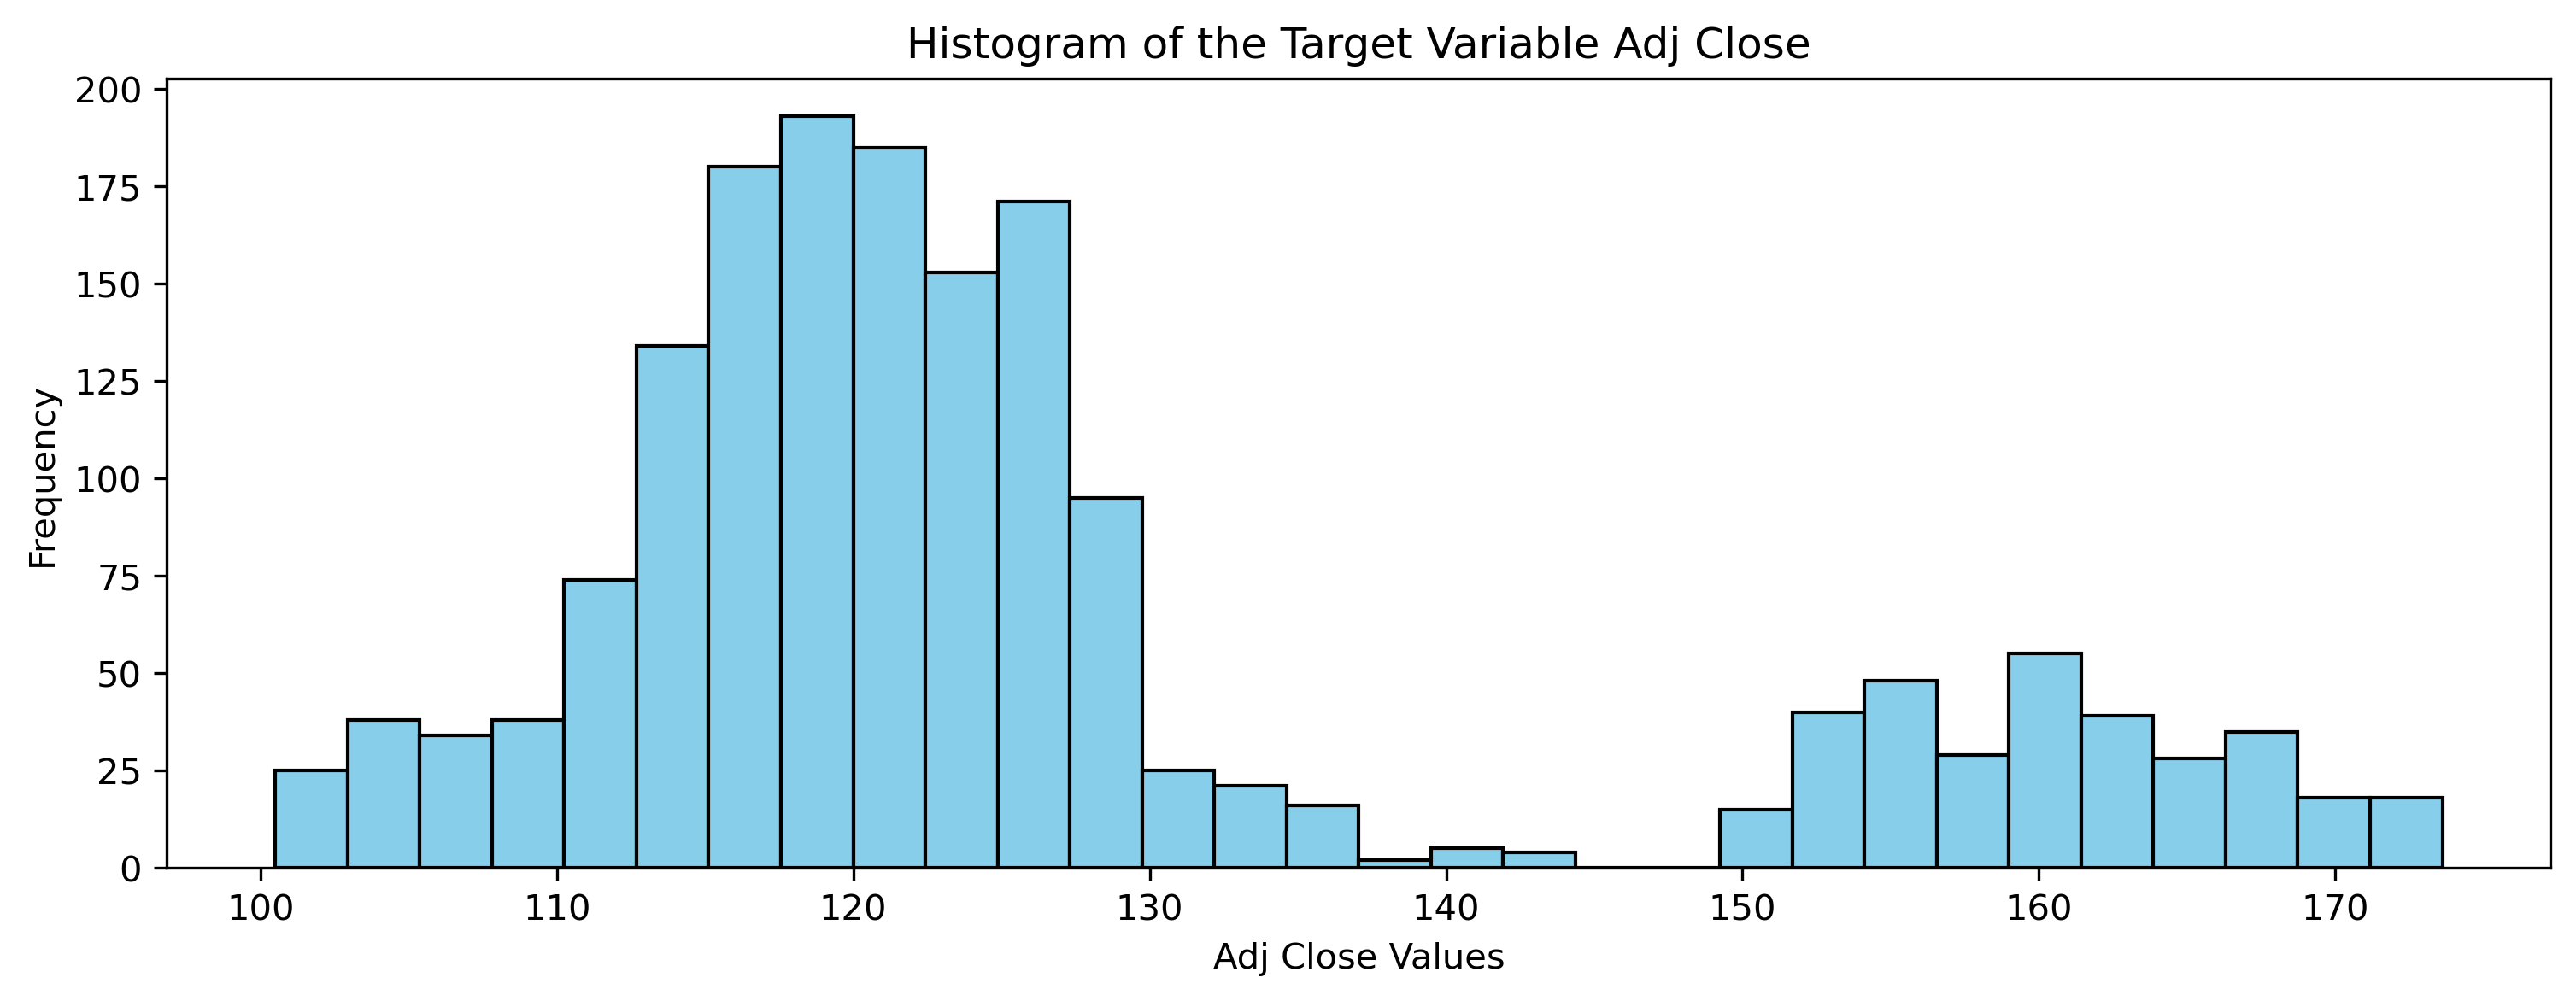

In [6]:
# The target variable is "Adj Close", which is the adjusted closing price of gold ETF
# From the histogram plot, we can see that the Adj Close is bimodal distributed with two peaks around 120 and 160
hist_plot(data,'Adj Close')

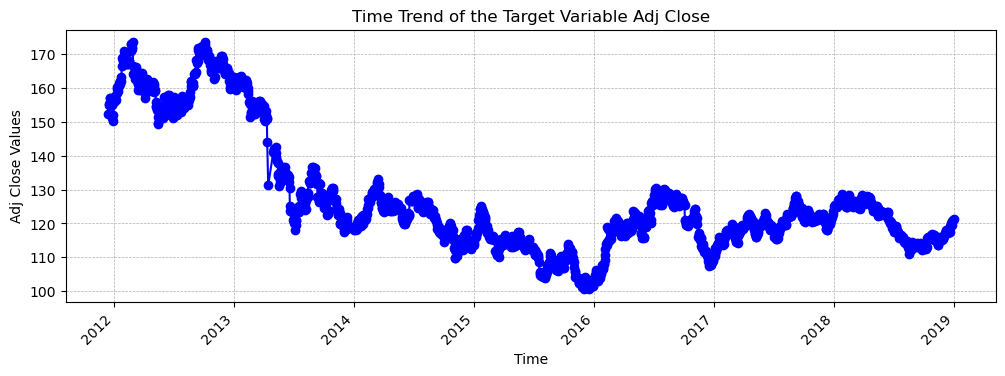

In [7]:
# Convert the date column to datetime type and plot the time series data
# The time trend plot shows the adjusted close prices fluctuates over time, decreasing from around 170 to around 120
data1=convert_datetime(data)
time_series_plot(data1,'Adj Close')

– Do we face missing values / outliers?


<Axes: >

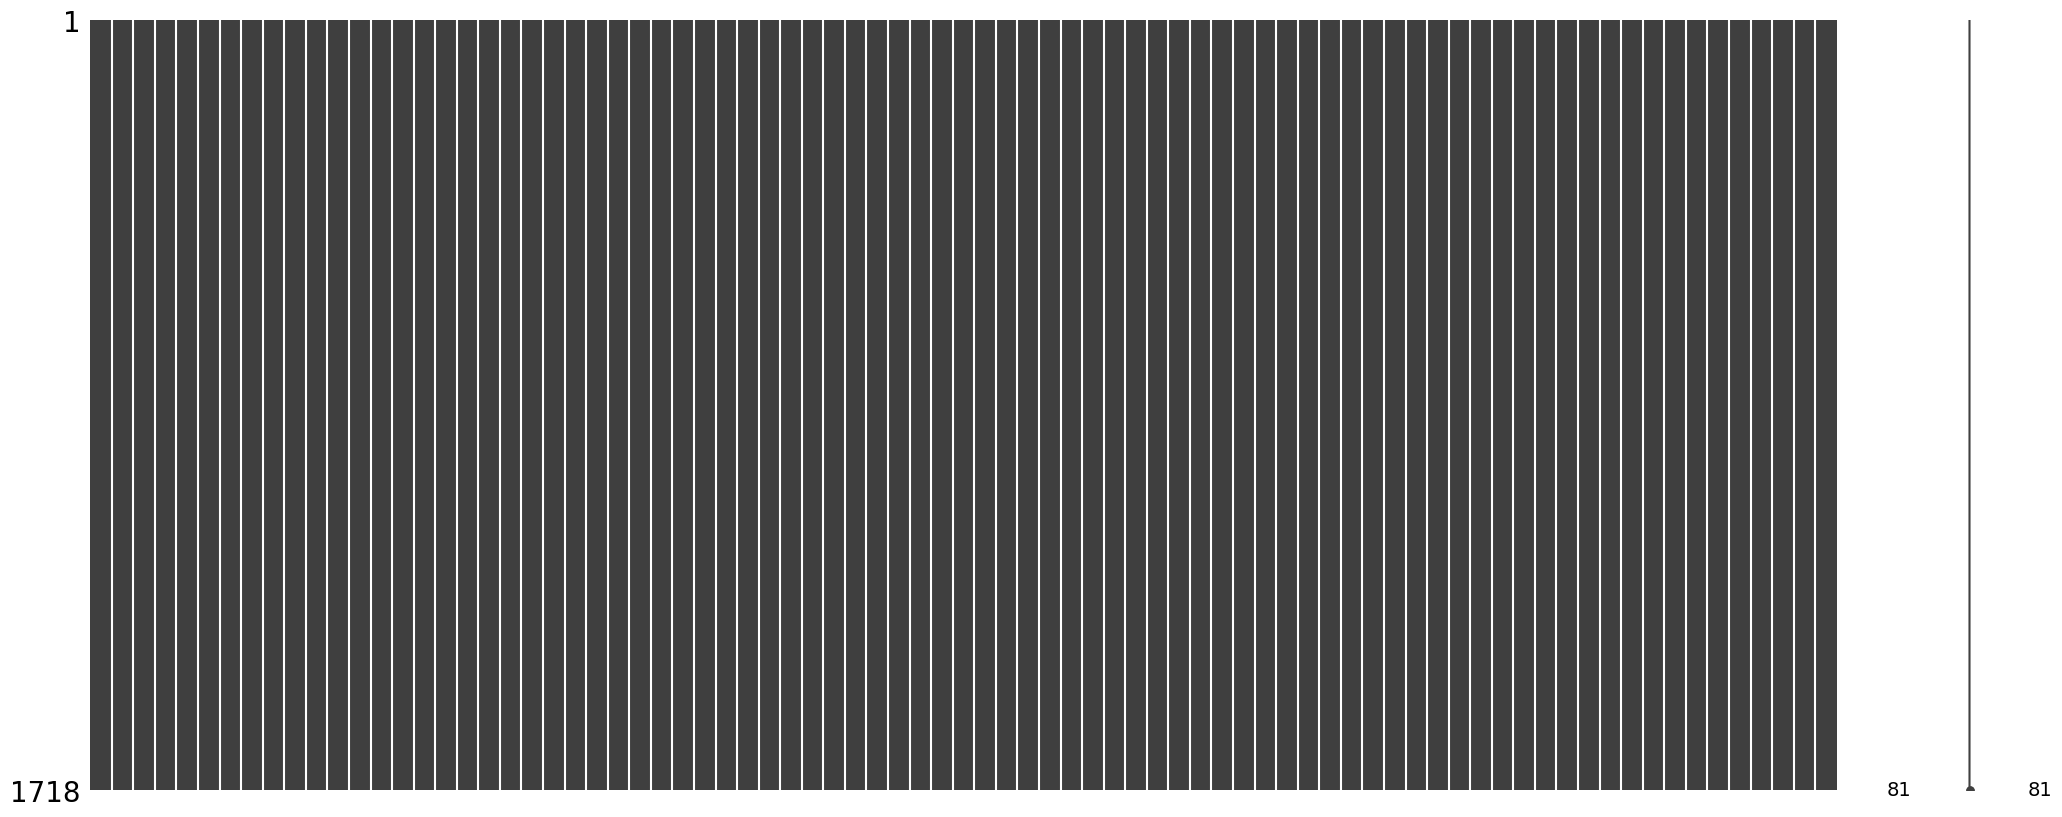

In [8]:
# There is no missing values
msn.matrix(data)

In [9]:
data.isnull().sum().sum()

0

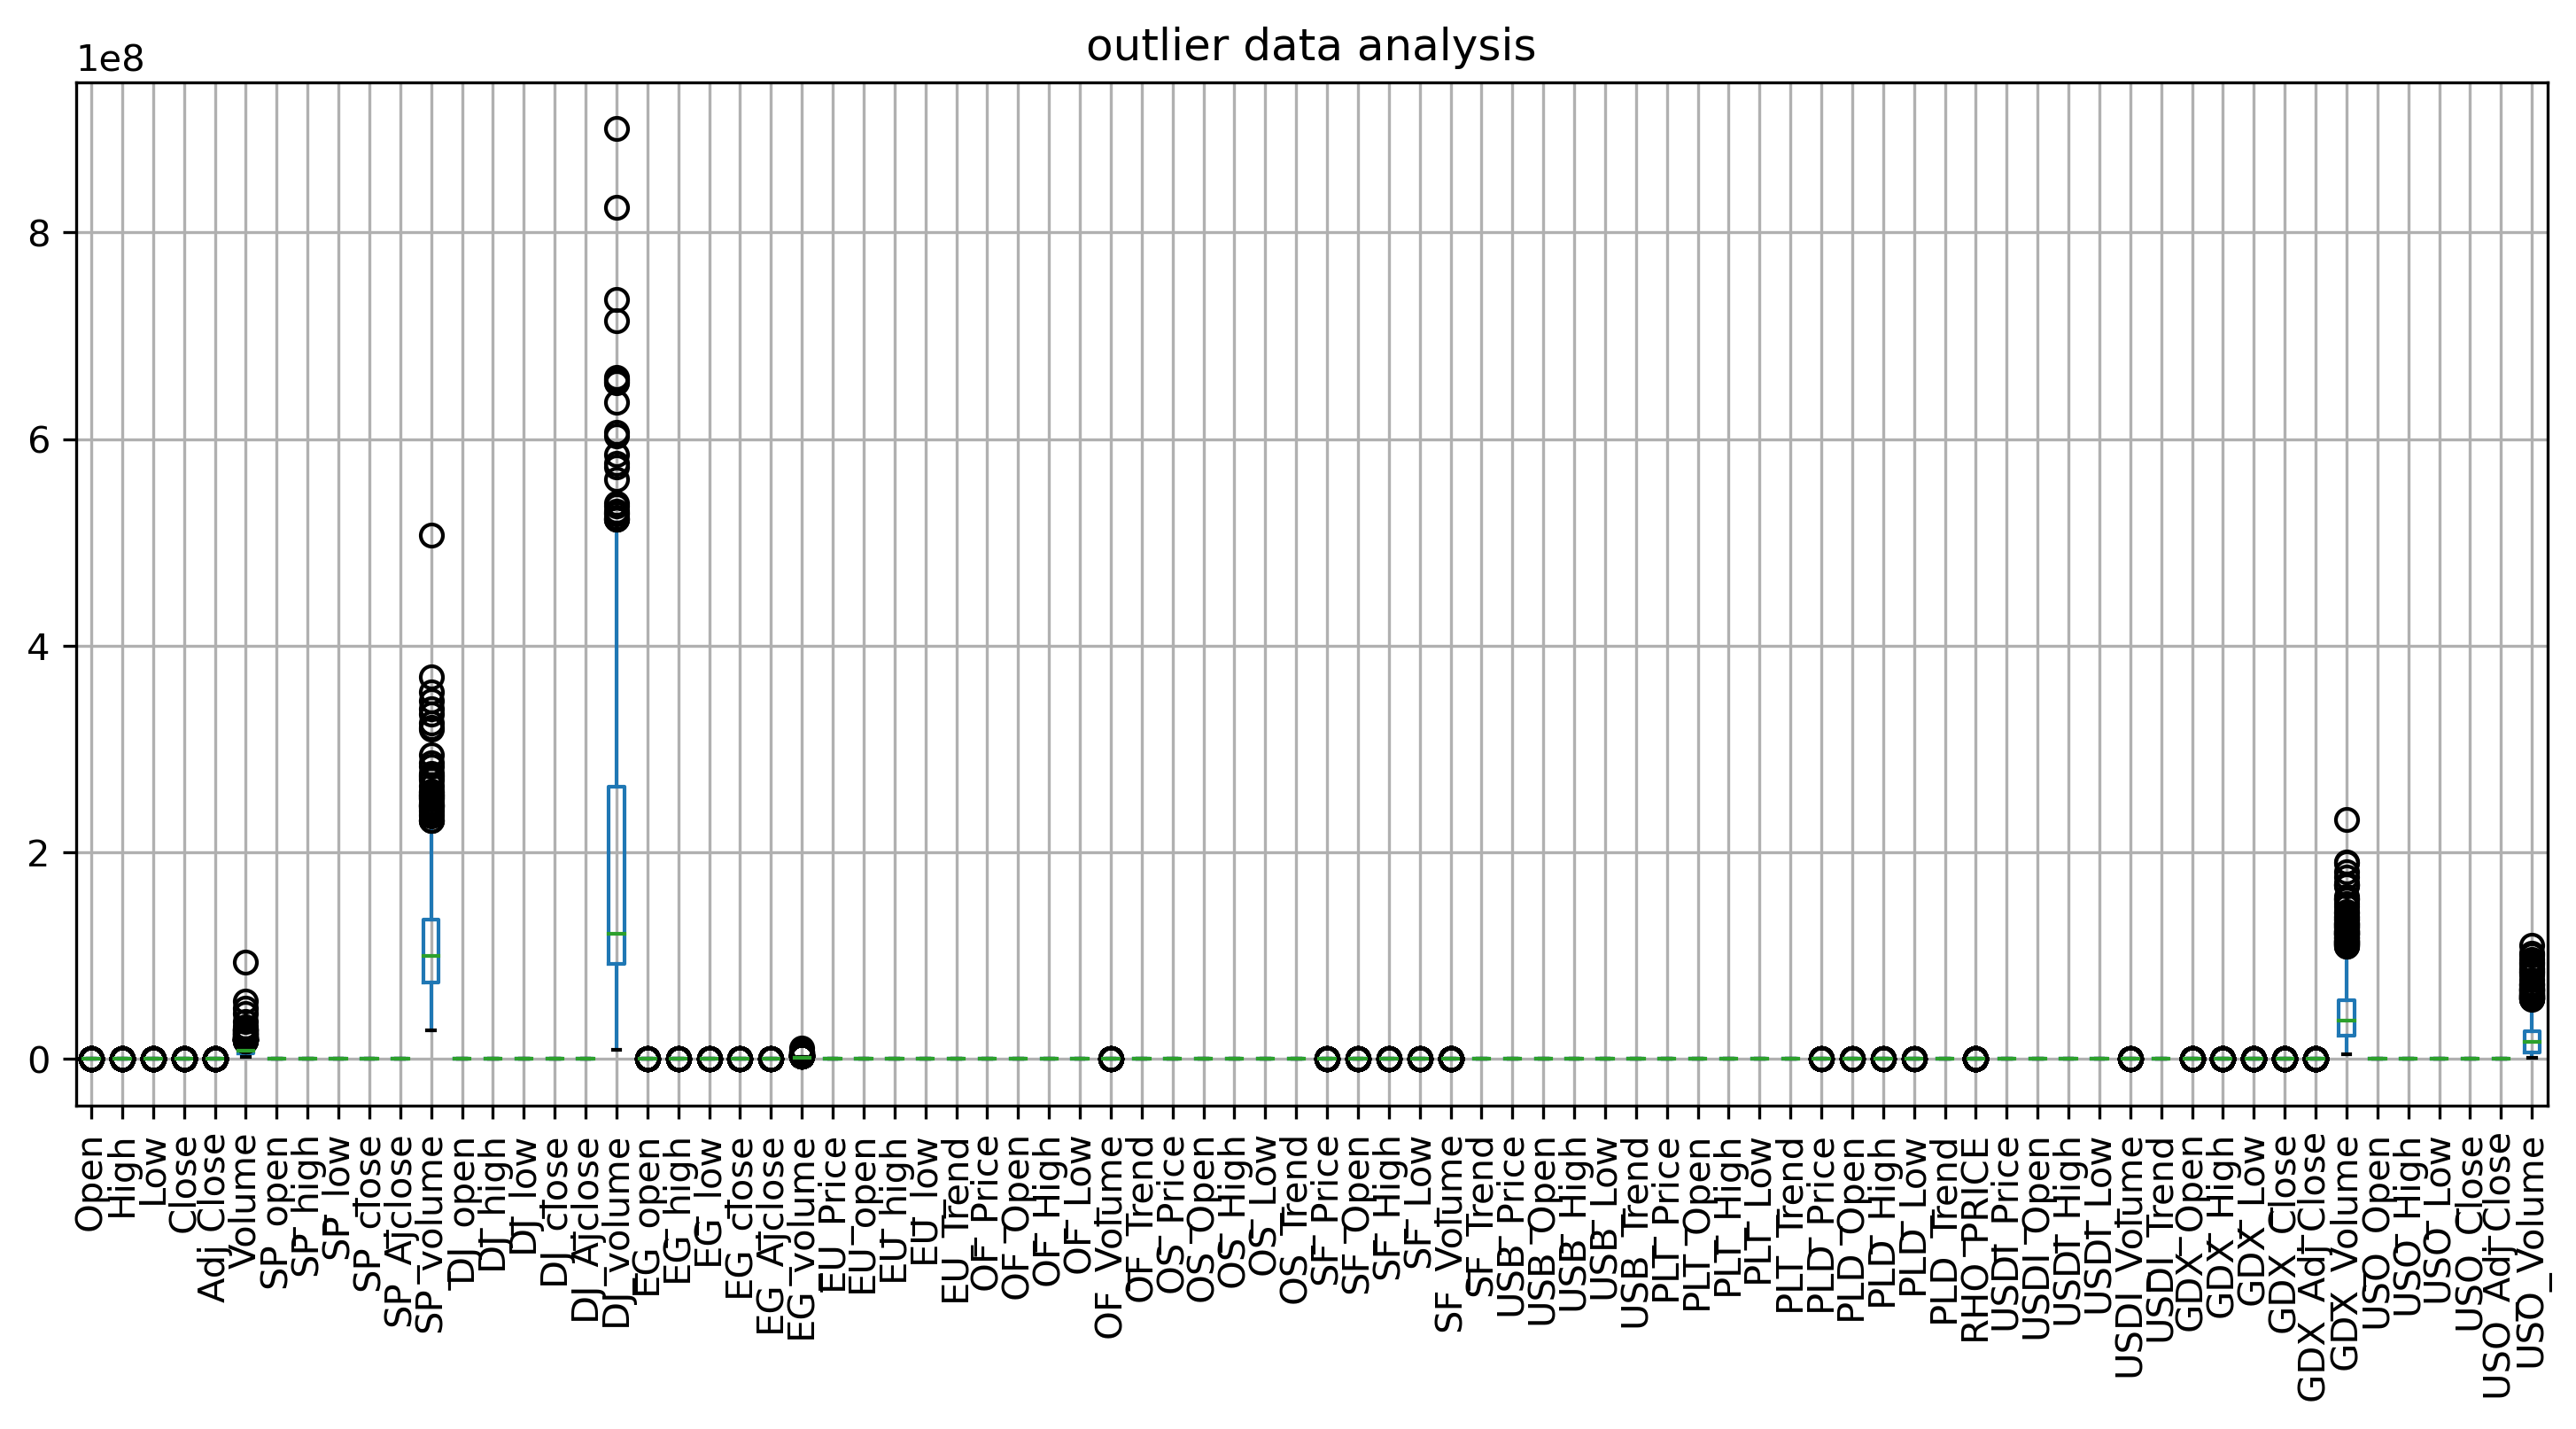

In [10]:
# There are some outliers
data2 = remove_filers_with_boxplot(data1)

– How do specific features correlate with the target variable?


In [11]:
# The correlation between the variables
# It can be seen that some variables such as Open, High, Low, and Close are very highly correlated with Adj Close
corr=data2.corr()
corr

,Open,High,Low,Close,Adj Close,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_Ajclose,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Price,EU_open,EU_high,EU_low,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Price,SF_Open,SF_High,SF_Low,SF_Volume,SF_Trend,USB_Price,USB_Open,USB_High,USB_Low,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Open,GDX_High,GDX_Low,GDX_Close,GDX_Adj Close,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Adj Close,USO_Volume
Open,1.000000,0.998336,0.998283,0.996888,0.996888,0.286217,-0.057478,-0.058527,-0.054817,-0.056581,-0.053126,-0.106648,0.038078,0.036932,0.040862,0.038957,0.038957,0.077238,0.316129,0.311595,0.317980,0.313682,0.312351,0.247119,0.573208,0.572222,0.571517,0.575781,0.030192,0.515595,0.510732,0.510893,0.514287,-0.021371,0.120167,0.524602,0.519635,0.519583,0.523524,0.092869,0.782708,0.781843,0.779108,0.785624,0.059685,0.032542,0.111273,0.109657,0.101107,0.117332,0.037333,0.530117,0.527811,0.526931,0.530393,0.055074,0.420920,0.417833,0.414684,0.420972,0.085851,0.328614,-0.573359,-0.572036,-0.574566,-0.571667,-0.261720,-0.022341,0.906464,0.905579,0.906034,0.903146,0.896580,-0.217141,0.368226,0.366858,0.371248,0.370503,0.370503,-0.379049
High,0.998336,1.000000,0.997898,0.998619,0.998619,0.303528,-0.066187,-0.067323,-0.063770,-0.065562,-0.061946,-0.096066,0.030288,0.029061,0.032809,0.030887,0.030887,0.074405,0.321911,0.318512,0.324350,0.320934,0.319571,0.255521,0.575744,0.574203,0.573830,0.577859,0.040231,0.518385,0.513453,0.513748,0.516910,-0.020363,0.122840,0.527369,0.522335,0.522456,0.526087,0.093858,0.786354,0.783127,0.782052,0.786991,0.067456,0.041059,0.110443,0.110069,0.101155,0.117086,0.029646,0.535490,0.532246,0.532007,0.534873,0.067358,0.414608,0.411103,0.408098,0.414285,0.088308,0.323950,-0.576266,-0.574326,-0.576976,-0.574366,-0.253535,-0.033120,0.905048,0.906362,0.905574,0.904467,0.897450,-0.206243,0.372399,0.371153,0.375421,0.374742,0.374742,-0.377769
Low,0.998283,0.997898,1.000000,0.998542,0.998542,0.270055,-0.050515,-0.051687,-0.047801,-0.049651,-0.046269,-0.114808,0.044600,0.043318,0.047380,0.045408,0.045408,0.082452,0.311211,0.307233,0.314164,0.310204,0.308902,0.242817,0.572801,0.571084,0.570527,0.575085,0.042774,0.515337,0.510397,0.510501,0.514068,-0.021494,0.123274,0.524471,0.519393,0.519308,0.523433,0.094843,0.783152,0.780615,0.778090,0.785435,0.053775,0.043399,0.113854,0.113580,0.104167,0.120818,0.027057,0.527442,0.524133,0.523444,0.527251,0.070424,0.426585,0.422897,0.419903,0.426303,0.092394,0.332056,-0.572183,-0.570070,-0.573094,-0.569858,-0.269183,-0.036131,0.905932,0.905993,0.907491,0.905221,0.899009,-0.227372,0.366237,0.364871,0.369377,0.368565,0.368565,-0.380978
Close,0.996888,0.998619,0.998542,1.000000,1.000000,0.288340,-0.056570,-0.057794,-0.054064,-0.055967,-0.052349,-0.106157,0.039426,0.038081,0.041988,0.039965,0.039965,0.081250,0.314561,0.311391,0.317887,0.314883,0.313557,0.249862,0.574150,0.572058,0.571739,0.576096,0.048340,0.516325,0.511416,0.511578,0.514952,-0.019315,0.122544,0.525603,0.520575,0.520546,0.524432,0.093330,0.784802,0.780694,0.779420,0.785375,0.059236,0.050467,0.112823,0.113887,0.104203,0.120392,0.018859,0.530554,0.526494,0.526314,0.529640,0.079352,0.420786,0.416954,0.414008,0.420355,0.093272,0.328183,-0.573821,-0.571285,-0.574339,-0.571354,-0.261209,-0.042556,0.904927,0.906559,0.907093,0.906746,0.900274,-0.216549,0.368214,0.366909,0.371336,0.370583,0.370583,-0.379538
Adj Close,0.996888,0.998619,0.998542,1.000000,1.000000,0.288340,-0.056570,-0.057794,-0.054064,-0.055967,-0.052349,-0.106157,0.039426,0.038081,0.041988,0.039965,0.039965,0.081250,0.314561,0.311391,0.317887,0.314883,0.313557,0.249862,0.574150,0.572058,0.571739,0.576096,0.048340,0.516325,0.511416,0.511578,0.514952,-0.019315,0.1

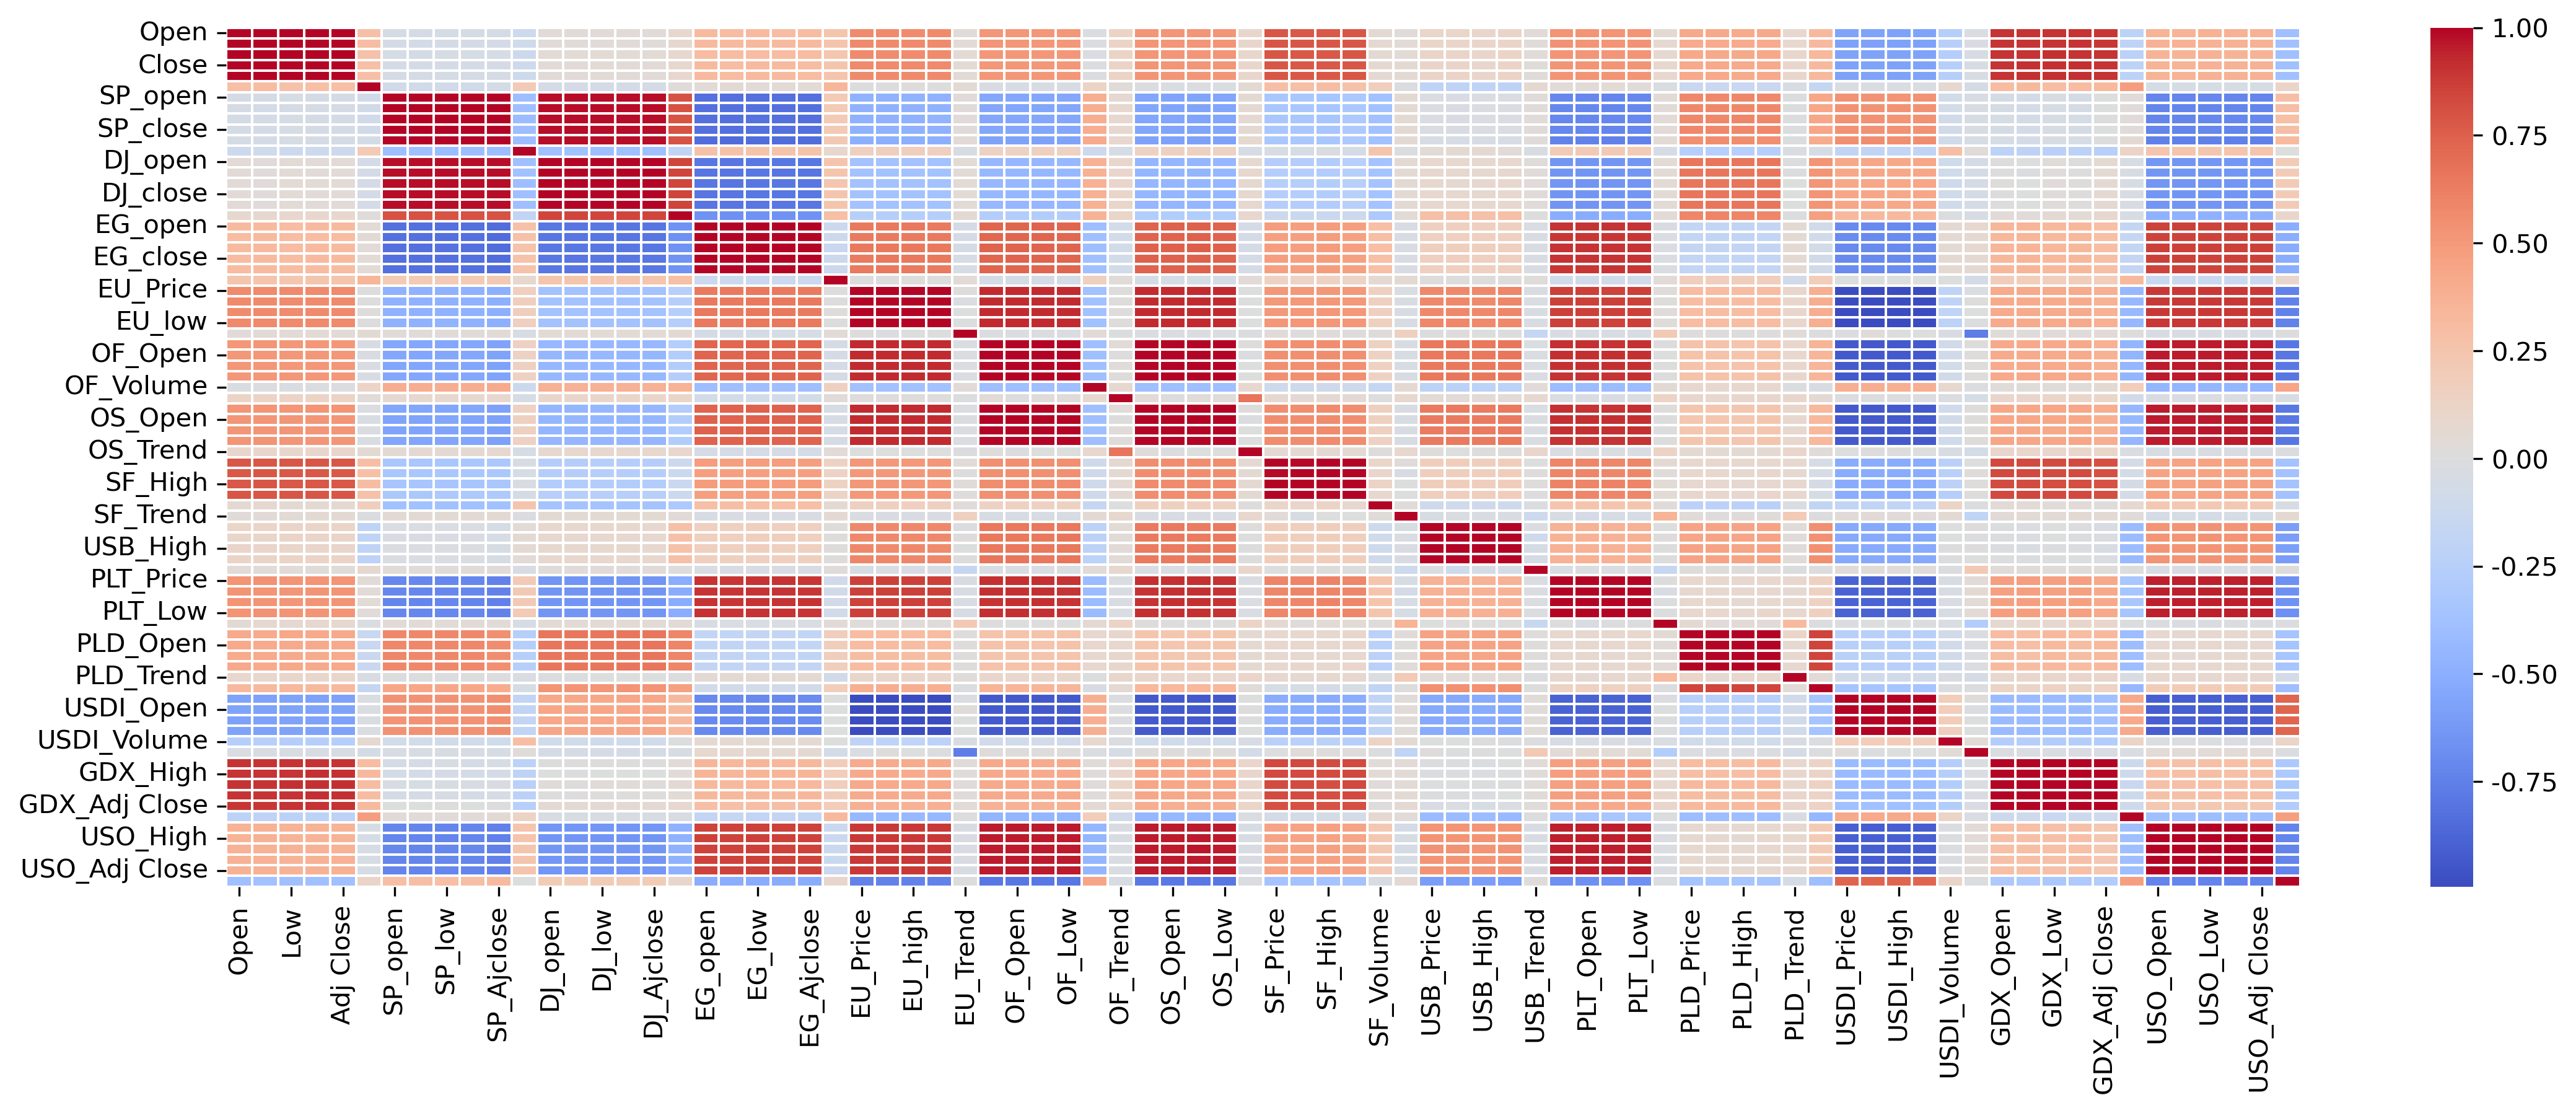

In [12]:
# The heatmap plot of correlation matrix
corr_heatmap(corr)

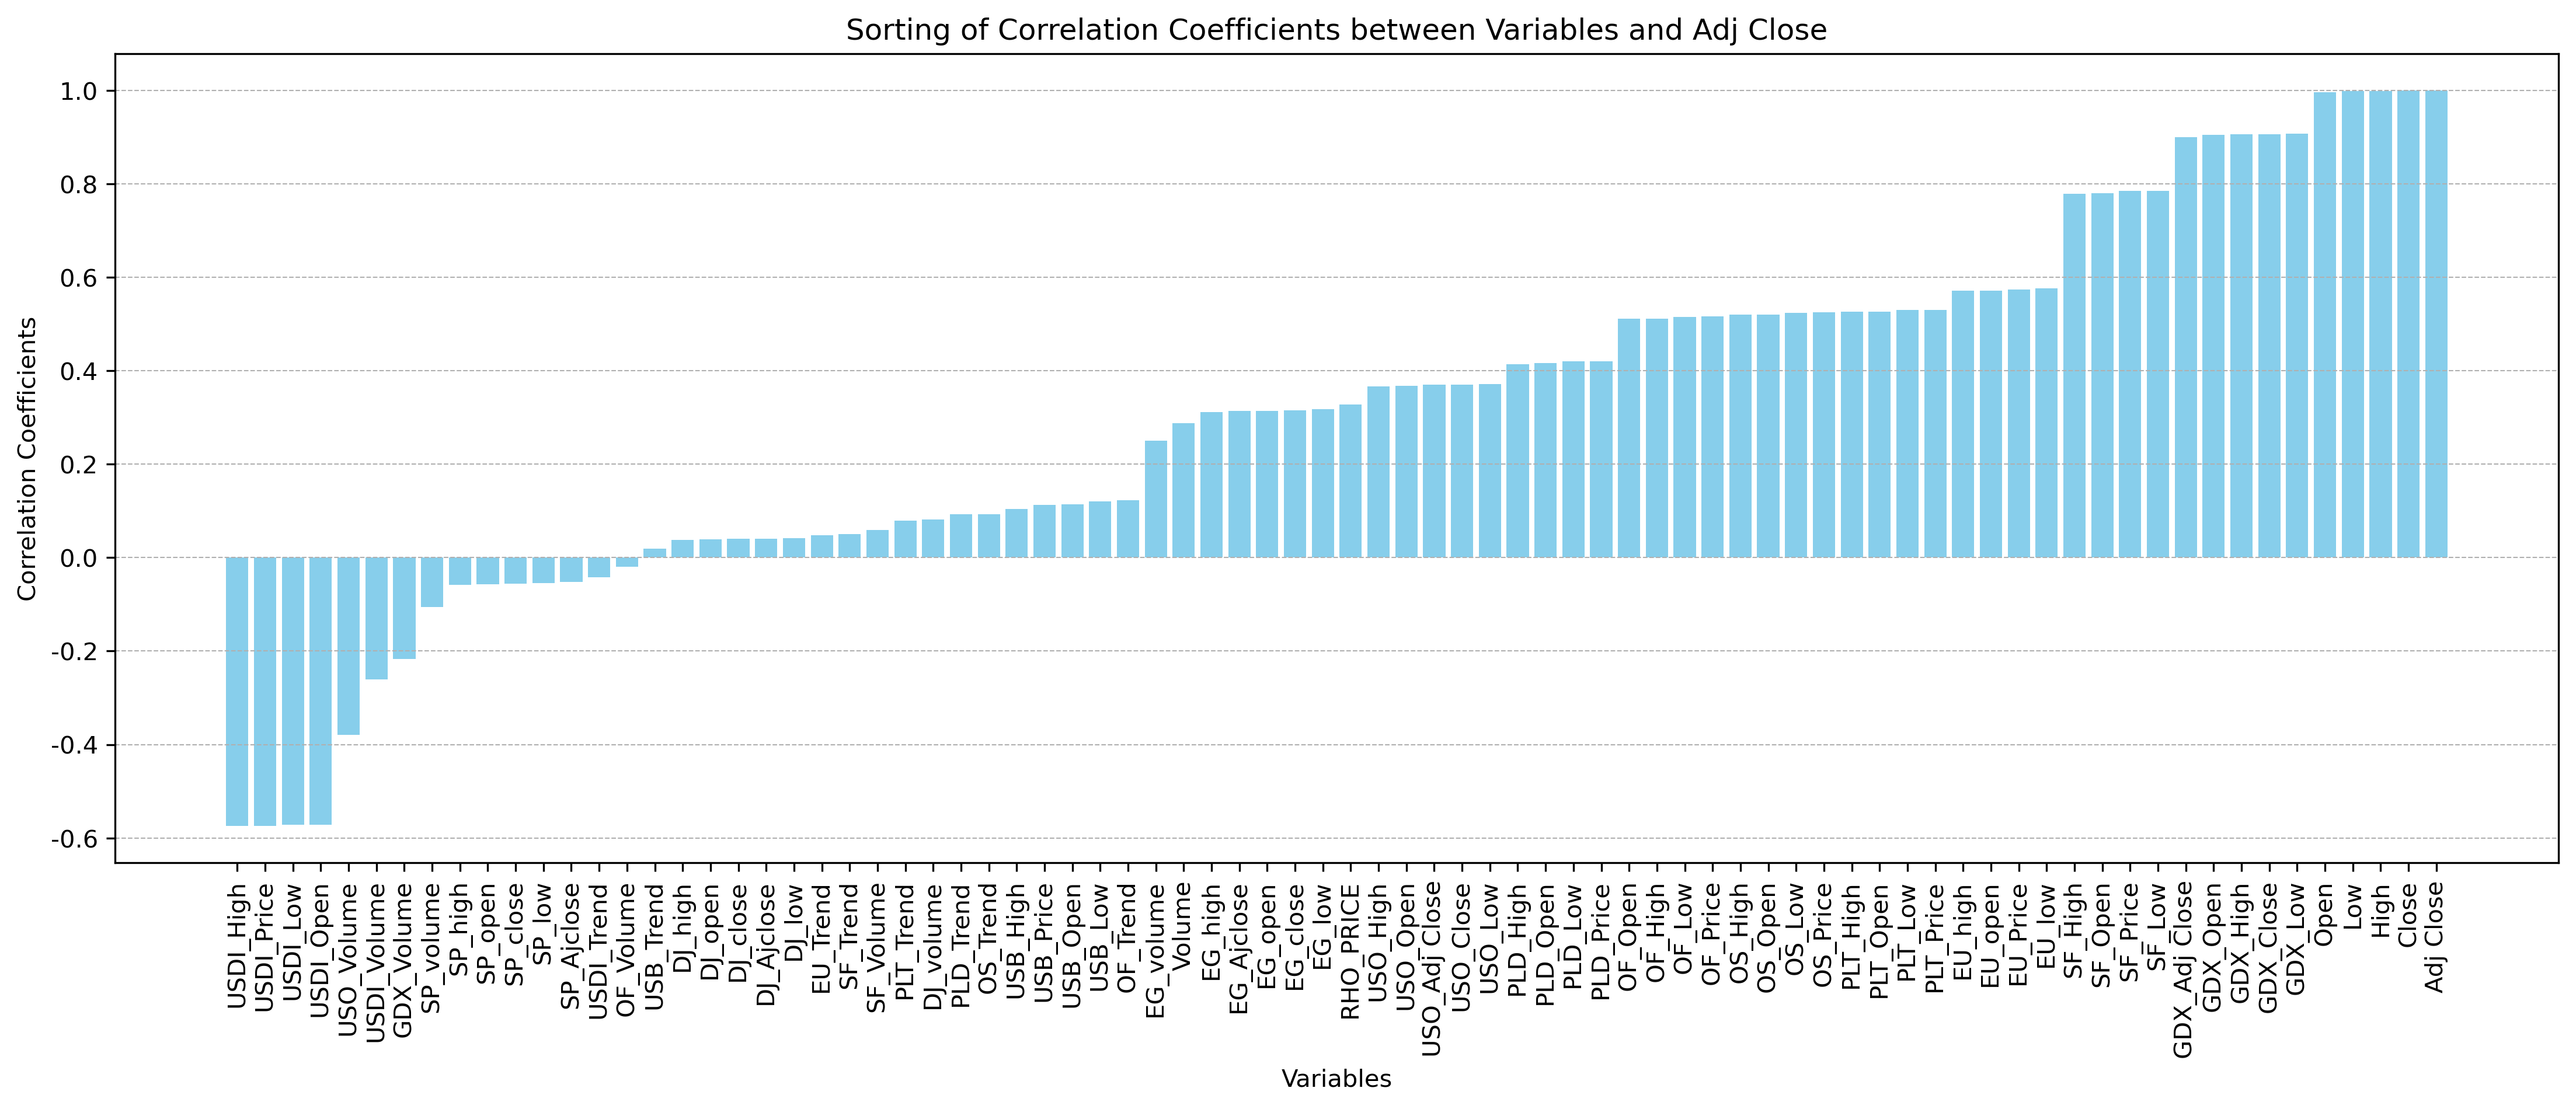

In [13]:
# This is a plot of the correlation coefficients between all other features and Adj Close
sort_corr=sort_corr(corr)

– What features can we use for the specific prediction task?

0.0005
Lasso picked 70 variables and eliminated the other 9 variables
0.10787918680290025


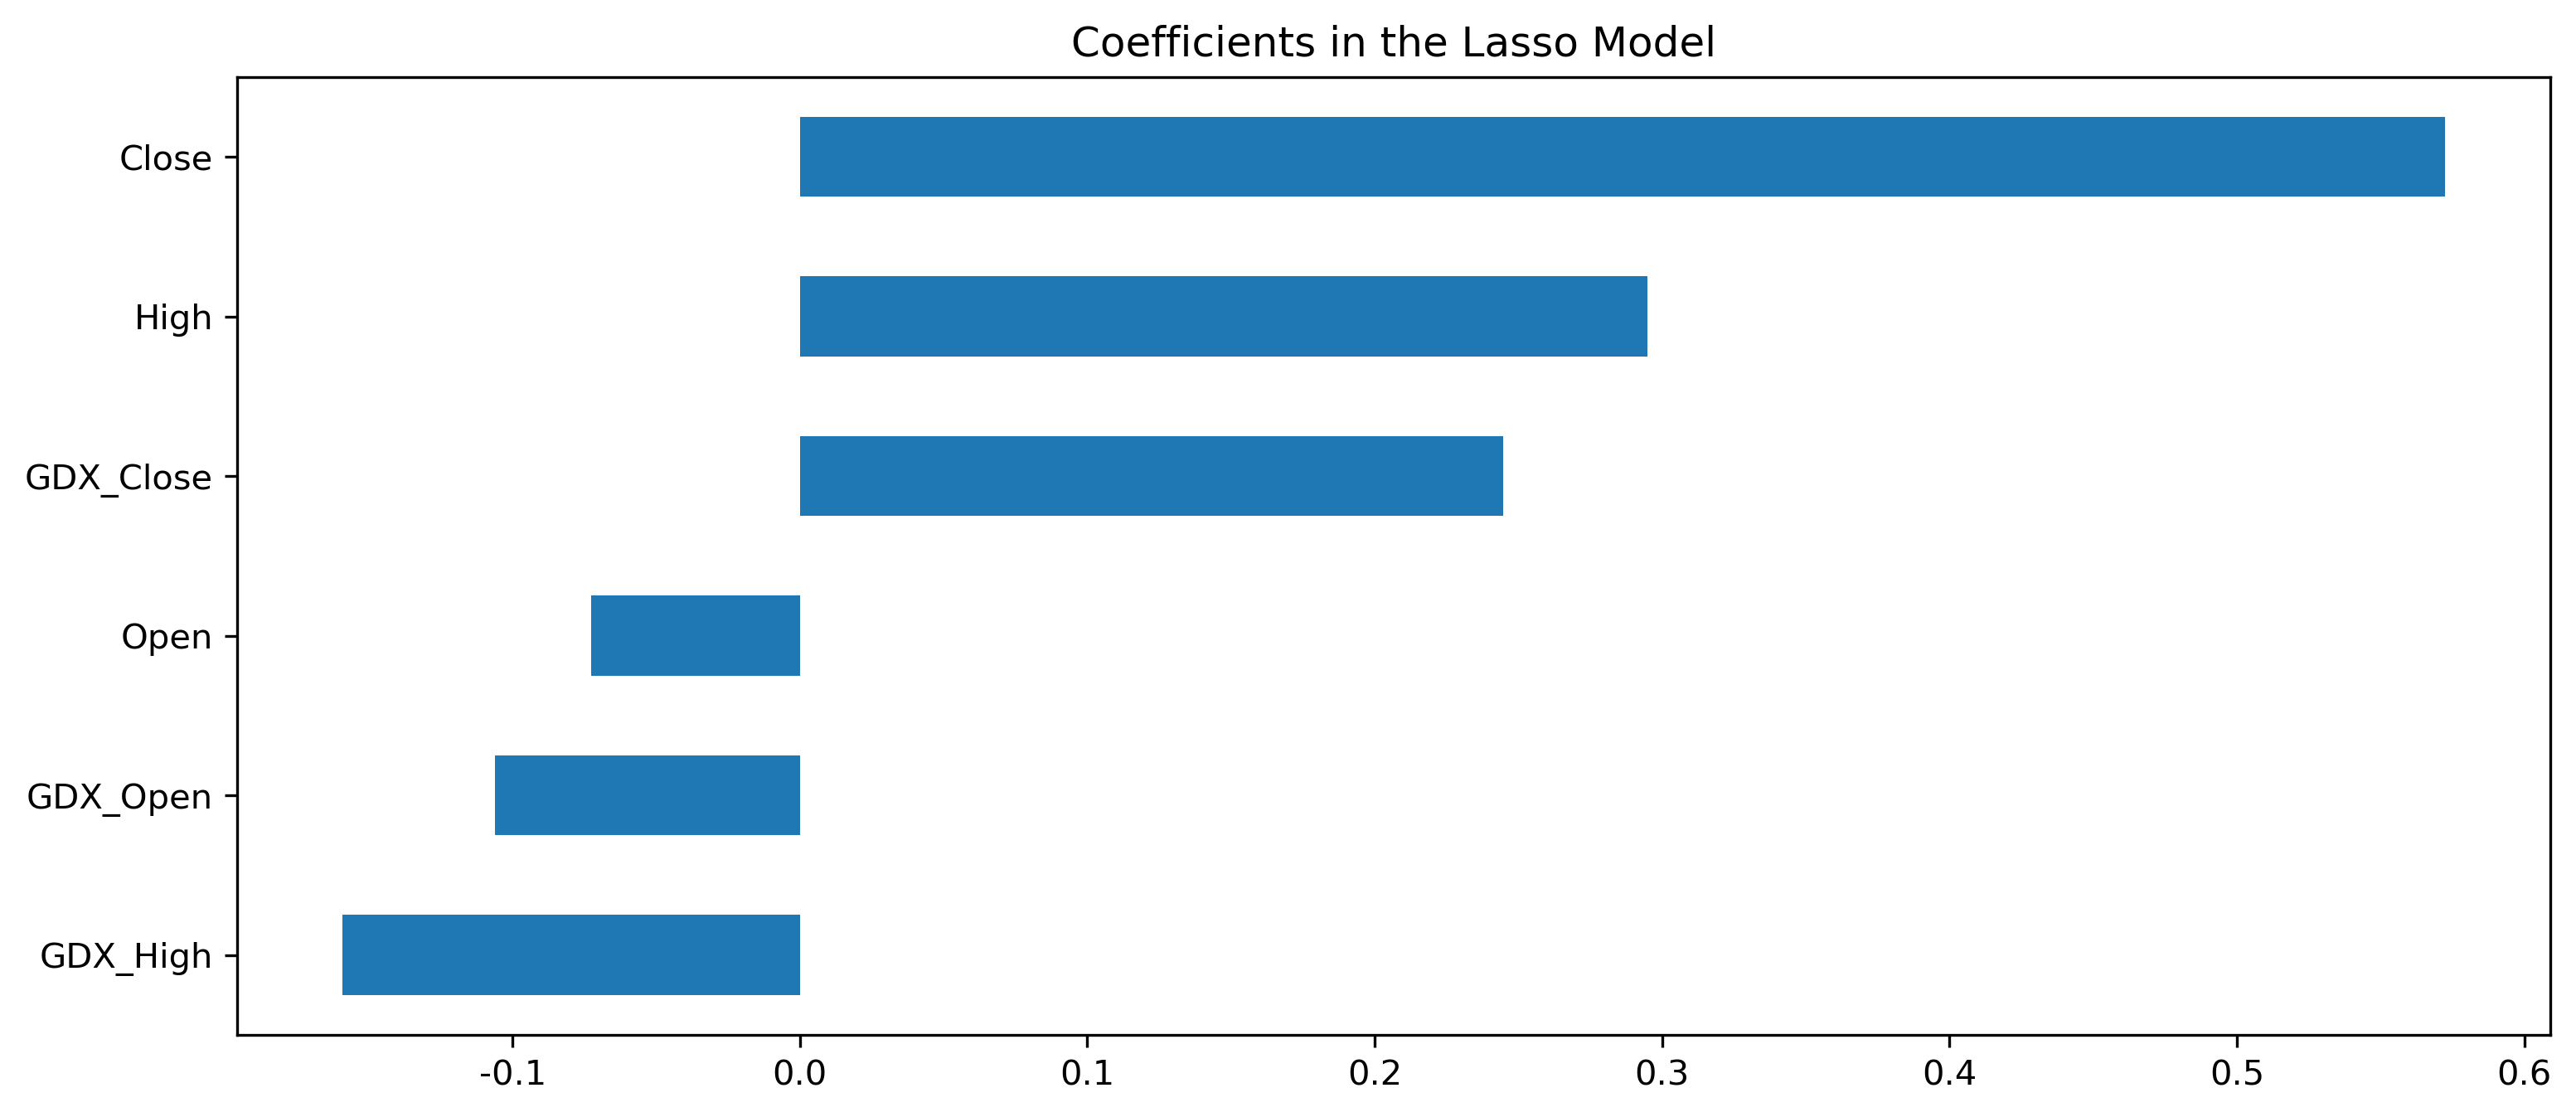

In [14]:
# Use Lasso regression for feature selection and calculate the coefficients
X_train = data2.drop(['Adj Close'], axis=1)
y = data2['Adj Close']
lasso_coef=lasso_features_selection(data2,X_train, y)

In [15]:
# List the columns with zero importance from Lasso Regression (to be deleted)
coef=pd.DataFrame([lasso_coef]).T
coef.index=X_train.columns
coef.columns=['importance']
coef=coef.sort_values(by='importance')
drop_lasso_features=coef[coef['importance']==0].index
print("Drop columns:",drop_lasso_features)

Drop columns: Index(['EU_low', 'USB_High', 'USB_Open', 'EU_high', 'EU_open', 'EU_Price',
       'USO_Adj Close', 'DJ_Ajclose', 'USB_Low'],
      dtype='object')


In [16]:
# List the columns with too high correlation (to be deleted)
drop_corr_feature=sort_corr[sort_corr>0.6].index
print("Drop columns:",drop_corr_feature)

Drop columns: Index(['SF_High', 'SF_Open', 'SF_Price', 'SF_Low', 'GDX_Adj Close', 'GDX_Open',
       'GDX_High', 'GDX_Close', 'GDX_Low', 'Open', 'Low', 'High', 'Close',
       'Adj Close'],
      dtype='object')


In [17]:
# I have to delete 44 variables in total
drop_features=list(set(list(drop_lasso_features)+list(drop_corr_feature)))
print("Drop features:",len(drop_features), drop_features)

Drop features: 23 ['SF_High', 'Low', 'DJ_Ajclose', 'EU_high', 'GDX_Close', 'USB_High', 'USO_Adj Close', 'GDX_Low', 'Close', 'Open', 'GDX_Adj Close', 'EU_open', 'EU_Price', 'GDX_High', 'GDX_Open', 'Adj Close', 'SF_Low', 'EU_low', 'High', 'USB_Low', 'SF_Price', 'SF_Open', 'USB_Open']


### clean data

In [ ]:
# Delete the features I listed in the last step
# PS: the outliers have been removed in the previous step
data3=pd.concat([data2.drop(drop_features, axis=1),y], axis=1)
data3.head()

,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Volume,SF_Trend,USB_Price,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-05-01,13931100,159.330002,159.410004,158.100006,158.279999,141.134918,138874200,14839.79981,14839.79981,14687.04981,14700.95020,112620000,38.150002,38.250000,36.750000,37.500000,36.872955,1288600,1,99.95,101.82,102.33,98.76,267100,0,90.97,93.16,93.34,90.19,0,5720,0,1.632,0,1478.15,1506.65,1508.80,1466.70,0,686.5,699.8,700.2,672.9,0,1150,81.522,81.740,81.780,81.370,24790,0,27633100,32.369999,32.560001,32.119999,32.389999,9949000,141.110001
2013-05-02,11502200,158.679993,159.889999,158.529999,159.750000,142.445679,96407600,14700.95020,14834.62988,14700.95020,14831.58008,91180000,38.299999,38.700001,37.599998,37.950001,37.315430,738300,0,102.85,99.82,102.98,99.51,287670,1,94.03,91.07,94.32,90.72,1,3910,1,1.624,0,1505.50,1477.90,1507.60,1463.35,1,695.2,686.2,696.1,683.2,1,1150,82.282,81.640,82.415,81.540,43070,1,12825400,32.590000,33.580002,32.540001,33.490002,7914600,141.919998
2013-05-03,11667100,161.139999,161.880005,159.779999,161.369995,143.890228,144202300,14831.58008,15009.58984,14831.58008,14973.95996,119890000,37.750000,38.799999,37.049999,37.549999,36.922112,983300,1,104.19,102.80,104.92,102.37,257170,1,95.58,94.07,96.12,93.64,1,1210,1,1.740,1,1500.10,1505.35,1518.95,1485.80,0,693.6,694.8,705.3,686.7,0,1150,82.195,82.290,82.610,81.835,41770,0,14874300,33.900002,34.220001,33.799999,34.009998,9565800,142.089996
2013-05-06,7730300,161.490005,162.009995,161.419998,161.779999,144.255783,66882100,14973.95996,14988.87012,14941.08984,14968.88965,116160000,37.150002,37.500000,36.500000,36.900002,36.282986,772000,0,105.46,104.25,105.54,103.89,135080,1,95.78,95.65,97.24,94.91,1,37060,1,1.764,1,1500.75,1502.15,1508.95,1491.45,0,695.6,693.6,697.3,690.1,1,1150,82.378,82.140,82.475,82.040,20040,1,7885300,33.959999,34.299999,33.799999,34.139999,4699200,142.149994
2013-05-08,11161100,162.419998,163.389999,162.330002,163.339996,145.646790,97419200,15056.20020,15106.80957,15021.87012,15105.12012,113510000,36.400002,38.400002,36.049999,38.099998,37.462914,859200,1,104.34,104.11,104.80,103.53,229320,0,96.64,95.62,96.83,95.30,1,47210,1,1.767,0,1501.45,1484.75,1508.65,1481.95,1,694.5,682.3,699.1,681.5,1,1150,81.951,82.365,82.400,81.780,25100,0,33362600,34.200001,34.470001,34.119999,34.400002,4918500,142.460007


In [19]:
# Save the prepared dataset to a .parquet file in the data folder 
file_path = 'data/data.parquet'
data3.to_parquet(file_path)
# Read the saved .parquet file and check the head of the data
data4 = pd.read_parquet(file_path)
data4.head()

,Volume,SP_open,SP_high,SP_low,SP_close,SP_Ajclose,SP_volume,DJ_open,DJ_high,DJ_low,DJ_close,DJ_volume,EG_open,EG_high,EG_low,EG_close,EG_Ajclose,EG_volume,EU_Trend,OF_Price,OF_Open,OF_High,OF_Low,OF_Volume,OF_Trend,OS_Price,OS_Open,OS_High,OS_Low,OS_Trend,SF_Volume,SF_Trend,USB_Price,USB_Trend,PLT_Price,PLT_Open,PLT_High,PLT_Low,PLT_Trend,PLD_Price,PLD_Open,PLD_High,PLD_Low,PLD_Trend,RHO_PRICE,USDI_Price,USDI_Open,USDI_High,USDI_Low,USDI_Volume,USDI_Trend,GDX_Volume,USO_Open,USO_High,USO_Low,USO_Close,USO_Volume,Adj Close
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2013-05-01,13931100,159.330002,159.410004,158.100006,158.279999,141.134918,138874200,14839.79981,14839.79981,14687.04981,14700.95020,112620000,38.150002,38.250000,36.750000,37.500000,36.872955,1288600,1,99.95,101.82,102.33,98.76,267100,0,90.97,93.16,93.34,90.19,0,5720,0,1.632,0,1478.15,1506.65,1508.80,1466.70,0,686.5,699.8,700.2,672.9,0,1150,81.522,81.740,81.780,81.370,24790,0,27633100,32.369999,32.560001,32.119999,32.389999,9949000,141.110001
2013-05-02,11502200,158.679993,159.889999,158.529999,159.750000,142.445679,96407600,14700.95020,14834.62988,14700.95020,14831.58008,91180000,38.299999,38.700001,37.599998,37.950001,37.315430,738300,0,102.85,99.82,102.98,99.51,287670,1,94.03,91.07,94.32,90.72,1,3910,1,1.624,0,1505.50,1477.90,1507.60,1463.35,1,695.2,686.2,696.1,683.2,1,1150,82.282,81.640,82.415,81.540,43070,1,12825400,32.590000,33.580002,32.540001,33.490002,7914600,141.919998
2013-05-03,11667100,161.139999,161.880005,159.779999,161.369995,143.890228,144202300,14831.58008,15009.58984,14831.58008,14973.95996,119890000,37.750000,38.799999,37.049999,37.549999,36.922112,983300,1,104.19,102.80,104.92,102.37,257170,1,95.58,94.07,96.12,93.64,1,1210,1,1.740,1,1500.10,1505.35,1518.95,1485.80,0,693.6,694.8,705.3,686.7,0,1150,82.195,82.290,82.610,81.835,41770,0,14874300,33.900002,34.220001,33.799999,34.009998,9565800,142.089996
2013-05-06,7730300,161.490005,162.009995,161.419998,161.779999,144.255783,66882100,14973.95996,14988.87012,14941.08984,14968.88965,116160000,37.150002,37.500000,36.500000,36.900002,36.282986,772000,0,105.46,104.25,105.54,103.89,135080,1,95.78,95.65,97.24,94.91,1,37060,1,1.764,1,1500.75,1502.15,1508.95,1491.45,0,695.6,693.6,697.3,690.1,1,1150,82.378,82.140,82.475,82.040,20040,1,7885300,33.959999,34.299999,33.799999,34.139999,4699200,142.149994
2013-05-08,11161100,162.419998,163.389999,162.330002,163.339996,145.646790,97419200,15056.20020,15106.80957,15021.87012,15105.12012,113510000,36.400002,38.400002,36.049999,38.099998,37.462914,859200,1,104.34,104.11,104.80,103.53,229320,0,96.64,95.62,96.83,95.30,1,47210,1,1.767,0,1501.45,1484.75,1508.65,1481.95,1,694.5,682.3,699.1,681.5,1,1150,81.951,82.365,82.400,81.780,25100,0,33362600,34.200001,34.470001,34.119999,34.400002,4918500,142.460007
